### Data Collection and Preparation

For this task we will be using the following libraries:
- `Pandas` for managing the data
- ``NumPy`` for math operations
- ``Sklearn`` for ML
- ``Seaborn`` for visialization
- `Matplotlib` for additional plotting


In [2]:
#import pandas & numpy library

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline



#read data file

data = 'charging_sessions.csv'

df = pd.read_csv("charging_sessions.csv")


In [3]:
#print the first 5 rows of the datafile

df.head(5)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [4]:
#print the last 5 rows of the datafile

df.tail(5)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
66449,10087,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [5]:
# df.columns

df.dtypes

Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [7]:
df.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [8]:
#Here we can see the lenght of the dataset

len(df)

66450

In [9]:
df.describe(include = "all")

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
count,66450.000000,66450,66450,66450,62362,66450.000000,66450,66450.000000,66450,66450,66450,49187.000000,49187
unique,NaN,65037,64839,64906,60637,NaN,65037,NaN,107,107,1,NaN,47822
top,NaN,5d3b9b4ff9af8b7392318319,2019-07-08 14:46:17+00:00,2021-07-22 14:35:55+00:00,2018-10-16 16:40:56+00:00,NaN,1_1_193_816_2019-07-10 13:29:21.499835,NaN,CA-303,2-39-139-28,America/Los_Angeles,NaN,"[{'WhPerMile': 300, 'kWhRequested': 21.0, 'mil..."
freq,NaN,2,14,7,8,NaN,2,NaN,1805,1805,66450,NaN,2
mean,4726.102062,NaN,NaN,NaN,NaN,11.787916,NaN,1.472656,NaN,NaN,NaN,1800.494582,NaN
std,3568.025394,NaN,NaN,NaN,NaN,10.314789,NaN,0.499256,NaN,NaN,NaN,2617.548614,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.501000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,1845.000000,NaN,NaN,NaN,NaN,5.097000,NaN,1.000000,NaN,NaN,NaN,431.000000,NaN
50%,3960.000000,NaN,NaN,NaN,NaN,9.140000,NaN,1.000000,NaN,NaN,NaN,818.000000,NaN
75%,7027.000000,NaN,NaN,NaN,NaN,14.183000,NaN,2.000000,NaN,NaN,NaN,1805.000000,NaN


In [10]:
df.isnull()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,False,False,False,False,False,False,False,False,False,False,False,False,False
66446,False,False,False,False,False,False,False,False,False,False,False,False,False
66447,False,False,False,False,False,False,False,False,False,False,False,False,False
66448,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.dropna(axis=0,inplace=False)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66444,10082,5d574ad2f9af8b4c10c03651,2019-07-31 14:50:17+00:00,2019-08-01 01:01:18+00:00,2019-07-31 20:29:24+00:00,27.174,1_1_191_784_2019-07-31 14:50:17.037367,1,AG-4F40,1-1-191-784,America/Los_Angeles,448.0,"[{'WhPerMile': 200, 'kWhRequested': 28.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."


In [12]:
df

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [13]:
df.dropna(axis=1)

,Unnamed: 0,id,connectionTime,disconnectTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles


In [14]:
len(df)-len(df.dropna())

20442

In [15]:
df[df['kWhDelivered'].isnull()]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs


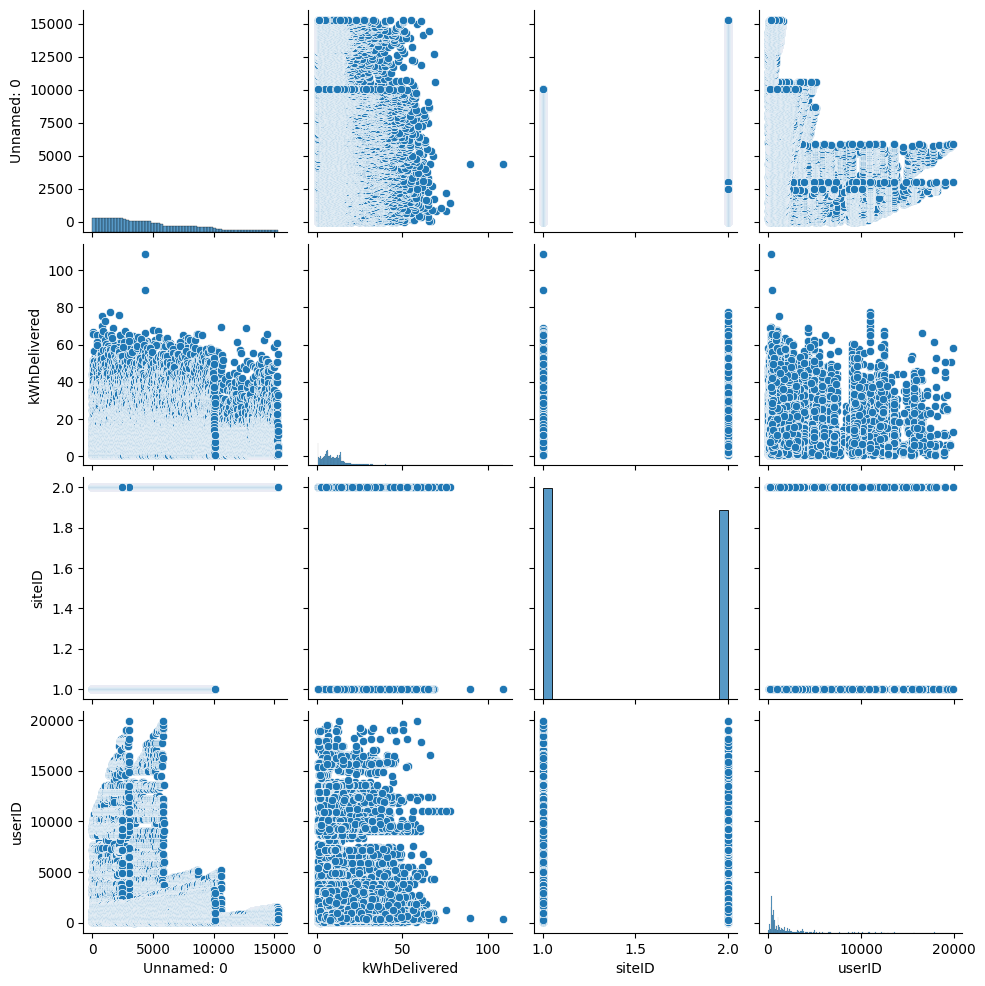

In [32]:
sns.pairplot(df)
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [29]:
df["connectionTime"] = pd.to_datetime(df["connectionTime"])
df["disconnectTime"] = pd.to_datetime(df["disconnectTime"])
df["doneChargingTime"] = pd.to_datetime(df["doneChargingTime"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        66450 non-null  int64              
 1   id                66450 non-null  object             
 2   connectionTime    66450 non-null  datetime64[ns, UTC]
 3   disconnectTime    66450 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      66450 non-null  float64            
 6   sessionID         66450 non-null  object             
 7   siteID            66450 non-null  int64              
 8   spaceID           66450 non-null  object             
 9   stationID         66450 non-null  object             
 10  timezone          66450 non-null  object             
 11  userID            49187 non-null  float64            
 12  userInputs        49187 non-null  object             
dtypes

In [31]:
df.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [34]:
df["connectionTime"].mean()

Timestamp('2019-08-06 20:19:01.997832704+0000', tz='UTC')

In [40]:
df["connectionTime"].dt.hour.mean()



14.645673438675695

In [41]:
df["connectionTime"].dt.day.mean()

15.622799097065462